<a href="https://colab.research.google.com/github/omtriguero/Artificial-Intelligence-Projects/blob/main/Data_Eng./Data_Engineering_Final_Project_(hotel_reservations).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FINAL PROJECT-CDBM-602-001 Data Engineerings.**
  

*   Anderson Delgado Rodriguez
*   Oscar Mauricio Trigueros

Follow this step-by-step guide to work on your project.


**Step 1: Select a real-world dataset**

>•Find a one of the interesting datasetes:

Hotel Booking Demand: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

https://www.kaggle.com/code/shyambv/starter-chest-x-ray-images-pneumonia-0f43d8bd-7



 >•The data should be in CSV format, and should contain at least 29 columns and 119390 rows.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model
import numpy as np


**Step 2: Perform data preparation & cleaning**

In [ ]:
df_ru = pd.read_csv("hotel_bookings.csv")
print(df_ru)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

•	Load the dataset into a data frame using Pandas

In [ ]:
df_ru.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Transient,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Transient,0,1,Check-Out,7/3/2015


Transform the month's names to numbers.

In [ ]:
m = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12 }

In [ ]:
df_ru.arrival_date_month = df_ru.arrival_date_month.map(m)

In [ ]:
pd.DataFrame(df_ru)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,NaN,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,NaN,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,NaN,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Transient,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,NaN,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Transient,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,NaN,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Transient,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,NaN,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Transient,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,NaN,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Transient,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,NaN,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Transient,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,NaN,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Transient,0,0,Check-Out,9/7/2017


•	Explore the number of rows & columns, ranges of values etc.



In [ ]:
df_ru.shape # numbers of columns and rows

(119390, 29)

In [ ]:
df_ru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  market_segment  

In [ ]:
type(df_ru)

pandas.core.frame.DataFrame

In [ ]:
df_ru.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
df_ru.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True
days_in_waiting_list              False
customer_type                     False


In [ ]:
df_ru.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363
std,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,8.000000,5.000000


•	Handle missing, incorrect and invalid data

In [ ]:
df_ru['agent'] = df_ru['agent'].fillna(df_ru['agent'].mean())

In [ ]:
df_ru['children'] = df_ru['children'].fillna(df_ru['children'].mean())

In [ ]:
df_ru['company'] = df_ru['company'].fillna(df_ru['company'].mean())

In [ ]:
print(df_ru)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

        arrival_date_month  arrival_date_week_number  \
0                      NaN                        27   
1                      NaN                        27   
2                      NaN 

**Step 3: Perform exploratory analysis & visualization**

•	Compute the mean, sum, range and other interesting statistics for numeric columns

In [ ]:
def range(series):
 return series.max()-series.min()

print(df_ru[['total_of_special_requests']].agg(['min', 'max','mean','std',range]))

       total_of_special_requests
min                     0.000000
max                     5.000000
mean                    0.571363
std                     0.792798
range                   5.000000


In [ ]:
def range(series):
 return series.max()-series.min()

print(df_ru[['days_in_waiting_list']].agg(['min', 'max','mean','std',range]))

       days_in_waiting_list
min                0.000000
max              391.000000
mean               2.321149
std               17.594721
range            391.000000


In [ ]:
def range(series):
 return series.max()-series.min()

print(df_ru[['is_canceled']].agg(['min', 'max','mean','std',range]))

       is_canceled
min       0.000000
max       1.000000
mean      0.370416
std       0.482918
range     1.000000


In [ ]:
def range(series):
 return series.max()-series.min()

print(df_ru[['lead_time']].agg(['min', 'max','mean','std',range]))

        lead_time
min      0.000000
max    737.000000
mean   104.011416
std    106.863097
range  737.000000


In [ ]:
def range(series):
 return series.max()-series.min()

print(df_ru[['arrival_date_year']].agg(['min', 'max','mean','std',range]))

       arrival_date_year
min          2015.000000
max          2017.000000
mean         2016.156554
std             0.707476
range           2.000000


In [ ]:
def range(series):
 return series.max()-series.min()

print(df_ru[['arrival_date_week_number']].agg(['min', 'max','mean','std',range]))

       arrival_date_week_number
min                    1.000000
max                   53.000000
mean                  27.165173
std                   13.605138
range                 52.000000


In [ ]:
def range(series):
 return series.max()-series.min()

print(df_ru[['arrival_date_day_of_month']].agg(['min', 'max','mean','std',range]))

       arrival_date_day_of_month
min                     1.000000
max                    31.000000
mean                   15.798241
std                     8.780829
range                  30.000000


In [ ]:
def range(series):
 return series.max()-series.min()

print(df_ru[['stays_in_weekend_nights']].agg(['min', 'max','mean','std',range]))

       stays_in_weekend_nights
min                   0.000000
max                  19.000000
mean                  0.927599
std                   0.998613
range                19.000000


Perform any additional steps (parsing dates, creating additional columns, merging multiple datasets etc.)


In [ ]:
cols = ['arrival_date_month','arrival_date_day_of_month' , 'arrival_date_year'] # We create a List to use a combination with / separator.
df_ru['arrival_date'] = df_ru[cols].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
date_df = df_ru['arrival_date']
date_df = pd.DataFrame(date_df )

  Data Frame with column with the date, combinied three columns: 'arrival_date_month','arrival_date_day_of_month' , 'arrival_date_year'.

In [ ]:
date_df

,arrival_date
0,7/1/2015
1,7/1/2015
2,7/1/2015
3,7/1/2015
4,7/1/2015
...,...
119385,8/30/2017
119386,8/31/2017
119387,8/31/2017
119388,8/31/2017


  Drop four columns from the  main Data Frame, the columns: 'arrival_date_month','arrival_date_number_of_week''arrival_date_day_of_month' , 'arrival_date_year'.

In [ ]:
df_ru_2 = df_ru.drop(['arrival_date_week_number', 'arrival_date_month','arrival_date_day_of_month' , 'arrival_date_year'], axis=1) # Drop columns with year, month, week and day.

In [ ]:
df_ru_2

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,market_segment,distribution_channel,...,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0.0,0,Direct,Direct,...,No Deposit,86.693382,189.266735,0,Transient,0,0,Check-Out,7/1/2015,nan/1.0/2015.0
1,Resort Hotel,0,737,0,0,2,0.0,0,Direct,Direct,...,No Deposit,86.693382,189.266735,0,Transient,0,0,Check-Out,7/1/2015,nan/1.0/2015.0
2,Resort Hotel,0,7,0,1,1,0.0,0,Direct,Direct,...,No Deposit,86.693382,189.266735,0,Transient,0,0,Check-Out,7/2/2015,nan/1.0/2015.0
3,Resort Hotel,0,13,0,1,1,0.0,0,Corporate,Corporate,...,No Deposit,304.000000,189.266735,0,Transient,0,0,Check-Out,7/2/2015,nan/1.0/2015.0
4,Resort Hotel,0,14,0,2,2,0.0,0,Online TA,TA/TO,...,No Deposit,240.000000,189.266735,0,Transient,0,1,Check-Out,7/3/2015,nan/1.0/2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,5,2,0.0,0,Offline TA/TO,TA/TO,...,No Deposit,394.000000,189.266735,0,Transient,0,0,Check-Out,9/6/2017,nan/30.0/2017.0
119386,City Hotel,0,102,2,5,3,0.0,0,Online TA,TA/TO,...,No Deposit,9.000000,189.266735,0,Transient,0,2,Check-Out,9/7/2017,nan/31.0/2017.0
119387,City Hotel,0,34,2,5,2,0.0,0,Online TA,TA/TO,...,No Deposit,9.000000,189.266735,0,Transient,0,4,Check-Out,9/7/2017,nan/31.0/2017.0
119388,City Hotel,0,109,2,5,2,0.0,0,Online TA,TA/TO,...,No Deposit,89.000000,189.266735,0,Transient,0,0,Check-Out,9/7/2017,nan/31.0/2017.0


Merge the main Data Frame with new collumn arrival date.

In [ ]:
df_left = pd.merge(df_ru_2,date_df, how='left')

df_left


NameError: ignored

In [ ]:
type(df_left['reservation_status_date'])


pandas.core.series.Series

Calculte from the arrival day until the check out day, how many days passed.

In [ ]:


df_d_date =  pd.to_datetime(pd.Series(df_left.reservation_status_date)) - pd.to_datetime(pd.Series(df_left.arrival_date))
df_d_date = pd.DataFrame(df_d_date)

In [ ]:
df_d_date

,0
0,0 days
1,0 days
2,0 days
3,0 days
4,0 days
...,...
21149805,9 days
21149806,9 days
21149807,9 days
21149808,9 days


Adding the column with the number of day the has stayed in hotel, to the maim DataFrame.

In [ ]:
df_final = pd.merge(df_left, df_d_date,left_index=True, right_index=True )


In [ ]:
df_final

Explore distributions of numeric columns using histograms etc.

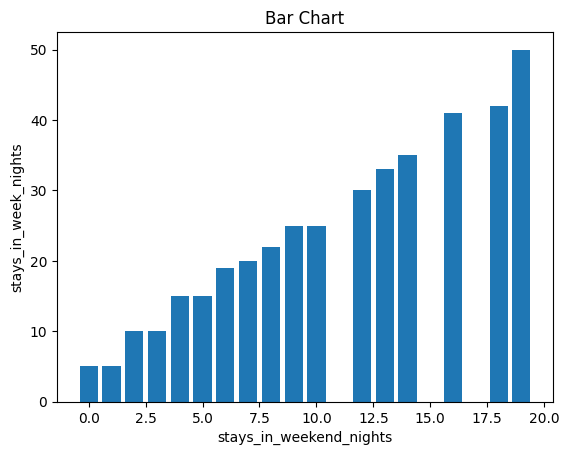

In [ ]:
plt.bar(df_ru['stays_in_weekend_nights'], df_ru['stays_in_week_nights'])
plt.title('Bar Chart')
plt.xlabel('stays_in_weekend_nights')
plt.ylabel('stays_in_week_nights')
plt.show()

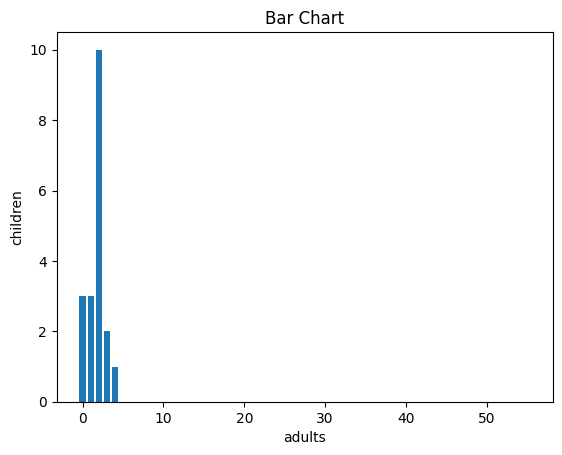

In [ ]:
plt.bar(df_ru['adults'], df_ru['children'])
plt.title('Bar Chart')
plt.xlabel('adults')
plt.ylabel('children')
plt.show()

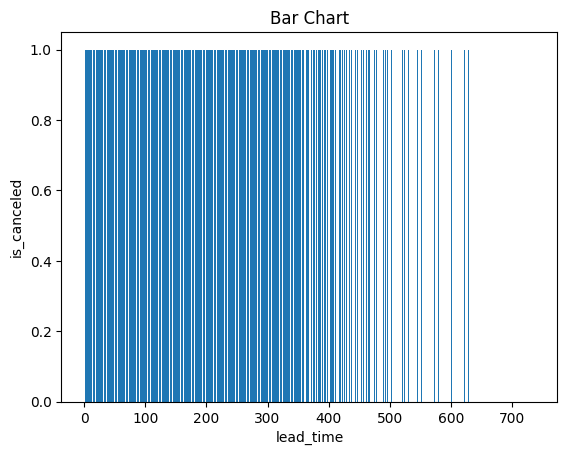

In [ ]:
plt.bar(df_ru['lead_time'], df_ru['is_canceled'])
plt.title('Bar Chart')
plt.xlabel('lead_time')
plt.ylabel('is_canceled')
plt.show()

<Axes: xlabel='lead_time', ylabel='stays_in_week_nights'>

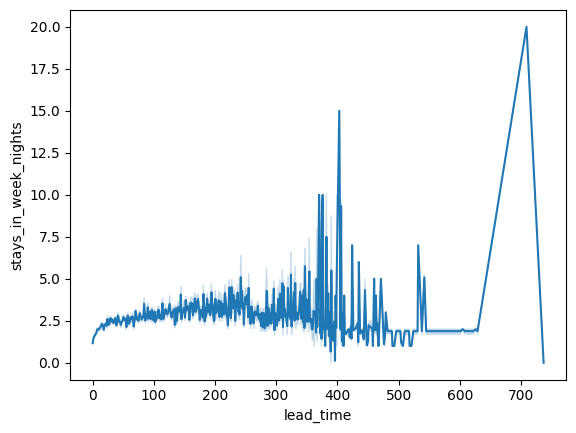

In [ ]:


sb.lineplot(x='lead_time', y='stays_in_week_nights', data=df_ru)

•	Explore relationship between columns using scatter plots, bar charts etc.

In [ ]:
sb.pairplot(df_ru)

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7abe7b5fd240> (for post_execute):


KeyboardInterrupt: ignored

**Step 4: Ask & answer questions about the data**

1.-What is the longest leadtime that a costumer has asked?

In [ ]:
np.max(df_ru ['lead_time'])

737

737 days in advance.

2.- What is the bigger quantity  of  costumer's children  ?   

In [ ]:
np.max(df_ru ['children'])

10.0

10 childreen

3.- What is the mean with the costumers change their booking ? :

In [ ]:
np.mean(df_ru ['booking_changes'])

0.22112404724013737

0.22 times

4.- What portentances of the guests have return ?

In [ ]:
new_guests = df_ru ['is_repeated_guest']==0

new_guests.sum()

115580

In [ ]:
old_guests = df_ru ['is_repeated_guest']==1
old_guests.sum()

3810

In [ ]:
total_guests=  new_guests.sum() + old_guests.sum()
print(total_guests)

119390


In [ ]:
def percentage(old, total):
   Percentage = 100 * float(old)/float(total)
   return str(Percentage) + '%'



In [ ]:
percentage(3810, 119390)

'3.191222045397437%'

3.19 percentage of the booking comes from guests that has return

**Step 5: Summarize your inferences & write a conclusion**

In the process of cleaning and processing the "Hotel Booking Demand" database, we have used Python programming language libraries such as Numpy for the analysis of statistical parameters, Pandas for editing and joining databases, MatplotLib and Seaborn for visualization between the database variables (columns) with all these tools, we have been able to analyze and deduce valuable inferences from the behaviors in the hospitality industry, using this particular case.

#Conclusions




1.   When cleaning the data, we use the mean to replace null values and not affect the relationship in the data.
2.   We use the function and series properties to calculate the statistical range in the variables, since there is no direct command available in the Numpy library to do this.

3. Using a bar chart for making the comparison between the columns "stays_in_weekend_nights" and "stays_in_week_nights", we could find the tendency that most of the people stayed more nights through the week than on the weekend.

4. Also, we could find in this dataset that most of the reservations were for "children" as the column shows. and in the last bar chart we can see that was a low tendency for canceling the maximun was 1 even if they were reserving with too much time, as a "lead_time" column shows.


5.   We can notice from the line graph the relation between  "stays_in_weekend_nights" vs "lead_time", that most day in advantage to booking a room, more nights the guests will stay.




